import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Improving on Homework 2 

In [2]:
df_vc = pd.read_csv("voltage_current_data.csv")
df_vc.head(5)

,voltage,current,type
0,26.040247,68.654996,Silicon
1,16.202469,45.383931,Silicon
2,18.105575,45.662902,Silicon
3,18.499687,49.730946,Silicon
4,23.625672,64.926232,Silicon


In [3]:
#2a
two_features = ['voltage', 'type']

two_feature_data = pd.DataFrame(df_vc[two_features])

dummies = pd.get_dummies(two_feature_data['type'])
data_w_dummies = pd.concat([two_feature_data, dummies], axis=1)
data_w_dummies = data_w_dummies.drop(['type'], axis=1)
data_w_dummies.iloc[48:52, :]

,voltage,Carbon,Germanium,Silicon
48,22.859473,0,0,1
49,28.763284,0,0,1
50,12.777193,1,0,0
51,18.781104,1,0,0


In [4]:
f_with_type = linear_model.LinearRegression()
f_with_type.fit(data_w_dummies, df_vc['current'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
f_with_type.coef_

array([  4.03744567,  -1.04996567,  26.83843466, -25.78846899])

In [6]:
f_with_type.intercept_

-0.35351803812464766

In [7]:
mean_squared_error(f_with_type.predict(data_w_dummies), df_vc['current'])

62.542793422591046

In [8]:
#3
# Our model in 2a has an output that is equal to theta_1*voltage + theta_2 (if silicon) + theta_3 (if carbon) + theta_4 (if germanium)
# That is, each type has a fixed positive offset.
#
# From our plot in 2b shows that this is not a good model. Instead, a better model would be:
# current = theta_1 * voltage (if silicon) + theta_2 * voltage (if carbon) + theta_3 * voltage (if germanium)
#
# To do this, we can replace the dummy value of 1 by the voltage and remove the 
# voltage column.
data_w_scaled_dummies = data_w_dummies.copy()
data_w_scaled_dummies['Carbon'] = data_w_scaled_dummies['Carbon'] * data_w_scaled_dummies['voltage']
data_w_scaled_dummies['Germanium'] = data_w_scaled_dummies['Germanium'] * data_w_scaled_dummies['voltage']
data_w_scaled_dummies['Silicon'] = data_w_scaled_dummies['Silicon'] * data_w_scaled_dummies['voltage']
data_w_scaled_dummies = data_w_scaled_dummies.drop(['voltage'], axis=1)
data_w_scaled_dummies.iloc[48:52, :]

,Carbon,Germanium,Silicon
48,0.000000,0.0,22.859473
49,0.000000,0.0,28.763284
50,12.777193,0.0,0.000000
51,18.781104,0.0,0.000000


In [9]:
f_vc_with_scaled_type = linear_model.LinearRegression()
f_vc_with_scaled_type.fit(data_w_scaled_dummies, df_vc['current'])
mean_squared_error(f_vc_with_scaled_type.predict(data_w_scaled_dummies), df_vc['current'])

25.714214023084757

In [10]:
f_vc_with_scaled_type.coef_

array([3.9045347 , 5.29989642, 2.72432338])

In [11]:
f_vc_with_scaled_type.intercept_

1.2044777216613909

### Introducing the MPG vs. Horsepower Model

In [12]:
#load the fuel dataset, and drop any rows that have missing data
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


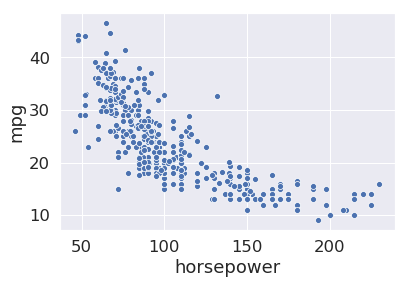

In [13]:
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(vehicle_data[['horsepower']], vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

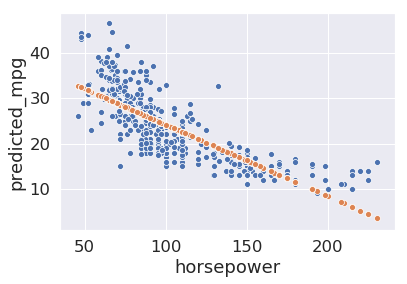

In [15]:
predicted_mpg = model.predict(vehicle_data[['horsepower']])
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
sns.scatterplot(x='horsepower', y='predicted_mpg', data=vehicle_data.assign(predicted_mpg=predicted_mpg))

In [16]:
model.coef_

array([-0.15784473])

In [17]:
model.intercept_

39.93586102117047

In [18]:
mean_squared_error(vehicle_data['mpg'], model.predict(vehicle_data[['horsepower']]))

23.943662938603108

In [19]:
#for convenience, let's make a new dataframe with just hp and hp^2
hp_and_hp2 =  pd.DataFrame({
    'hp': vehicle_data['horsepower'],
    'hp^2': vehicle_data['horsepower']**2,
})
hp_and_hp2.head(5)

,hp,hp^2
0,130.0,16900.0
1,165.0,27225.0
2,150.0,22500.0
3,150.0,22500.0
4,140.0,19600.0


In [20]:
#build a model that tries to predict mpg from hp and hp^2
model2 = LinearRegression()
model2.fit(hp_and_hp2, vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

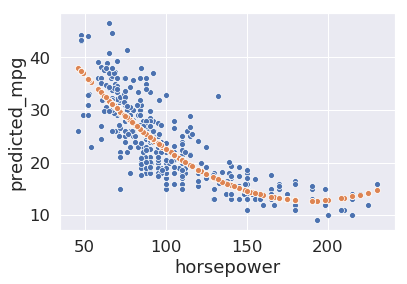

In [21]:
model2_predicted_mpg = model2.predict(hp_and_hp2)
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
sns.scatterplot(x='horsepower', y='predicted_mpg', data=vehicle_data.assign(predicted_mpg=model2_predicted_mpg))

In [22]:
model2.coef_

array([-0.46618963,  0.00123054])

In [23]:
mean_squared_error(vehicle_data['mpg'], model2.predict(hp_and_hp2))

18.98476890761722

In [24]:
#for convenience, let's make a new dataframe with just hp and hp^2
hp_and_hp2_and_bias =  pd.DataFrame({
    'hp': vehicle_data['horsepower'],
    'hp^2': vehicle_data['horsepower']**2,
    'bias': vehicle_data['horsepower'] / vehicle_data['horsepower'] # better to do np.ones(len(vehicle_data))
})
hp_and_hp2_and_bias.head(5)

,bias,hp,hp^2
0,1.0,130.0,16900.0
1,1.0,165.0,27225.0
2,1.0,150.0,22500.0
3,1.0,150.0,22500.0
4,1.0,140.0,19600.0


In [25]:
#build a model that tries to predict mpg from hp and hp^2
model2b = LinearRegression(fit_intercept=False)
model2b.fit(hp_and_hp2_and_bias, vehicle_data['mpg'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [26]:
model2b.coef_

array([ 5.69000997e+01, -4.66189630e-01,  1.23053610e-03])

In [27]:
model2b.intercept_

0.0

### Overfitting

In [28]:
x_values = np.array([0, 1, 2, 3])
x_values

array([0, 1, 2, 3])

In [29]:
y_values = np.array([0, 3, 2, 1])
y_values

array([0, 3, 2, 1])

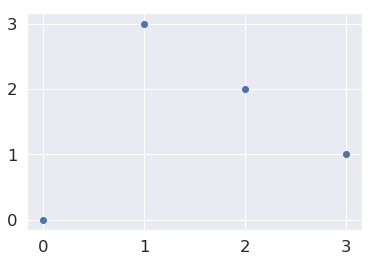

In [30]:
plt.scatter(x_values, y_values)

In [31]:
arbitrary_data =  pd.DataFrame({
    'x': x_values,
    'y': y_values,
})
arbitrary_data

,x,y
0,0,0
1,1,3
2,2,2
3,3,1


In [32]:
x_x2_and_x3 =  pd.DataFrame({
    'x': arbitrary_data['x'],
    'x^2': arbitrary_data['x']**2,
    'x^3': arbitrary_data['x']**3,
})
x_x2_and_x3.head()

,x,x^2,x^3
0,0,0,0
1,1,1,1
2,2,4,8
3,3,9,27


In [33]:
#build a model that tries to predict y from x, x^2, and x^3
arbitrary_data_model = LinearRegression()
arbitrary_data_model.fit(x_x2_and_x3, arbitrary_data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
arbitrary_data_model.coef_

array([ 6.33333333, -4.        ,  0.66666667])

In [35]:
arbitrary_data_model.intercept_

5.329070518200751e-15

In [36]:
more_x_points = np.linspace(0, 3, 100)

more_x_features =  pd.DataFrame({
    'x': more_x_points,
    'x^2': more_x_points**2,
    'x^3': more_x_points**3,
})

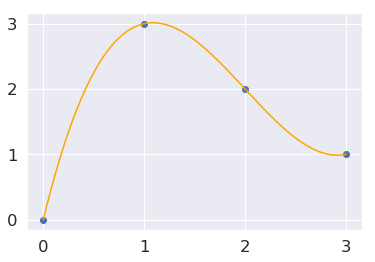

In [37]:
predicted_y = arbitrary_data_model.predict(more_x_features)
plt.scatter(x_values, y_values)
plt.plot(more_x_points, predicted_y, 'orange')

In [38]:
mean_squared_error(arbitrary_data_model.predict(x_x2_and_x3), arbitrary_data['y'])

2.0809287863115206e-29

Alternate solution: Just use linear algebra directly.

In [39]:
Phi = np.array([[0,0,0,1], [1,1,1,1], [2,4,8,1], [3,9,27,1]])
Y_hat = np.array([0,3,2,1])

In [40]:
Phi

array([[ 0,  0,  0,  1],
       [ 1,  1,  1,  1],
       [ 2,  4,  8,  1],
       [ 3,  9, 27,  1]])

In [41]:
Y_hat

array([0, 3, 2, 1])

In [42]:
theta = np.linalg.solve(Phi, Y_hat)
theta

array([ 6.33333333, -4.        ,  0.66666667,  0.        ])

In [43]:
# or if you want to do it the less efficient way, 
# can explicitly create the inverse, then multiply using the 
# matrix multiplication operator @
Phi_inverse = np.linalg.inv(Phi)
theta = Phi_inverse @ Y_hat

In [44]:
theta

array([ 6.33333333, -4.        ,  0.66666667,  0.        ])

### More Advanced scikit-learn Code

We can also avoid manually creating a bunch of features by using sklearn's PolynomialFeatures capability.

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly3 = PolynomialFeatures(degree=3)
x_x2_and_x3 = poly3.fit_transform(arbitrary_data[['x']])
x_x2_and_x3

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [46]:
#since the output of the polynomial transform includes the bias term, 
#we set fit_intercept to false
arbitrary_data_model = LinearRegression(fit_intercept=False)
arbitrary_data_model.fit(x_x2_and_x3, arbitrary_data['y'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [47]:
#printing out the coefficients, we see we get the same values
arbitrary_data_model.coef_

array([-1.34232805e-14,  6.33333333e+00, -4.00000000e+00,  6.66666667e-01])

In [48]:
## can also do using a scikit "pipeline"

from sklearn.pipeline import Pipeline

pipeline_version_of_model = Pipeline([
    ('josh_transform', PolynomialFeatures(degree=3)),
    ('josh_regression', LinearRegression(fit_intercept=False)),
])
pipeline_version_of_model.fit(arbitrary_data[['x']], arbitrary_data['y']);

In [49]:
pipeline_version_of_model.named_steps['josh_regression'].coef_

array([-1.34232805e-14,  6.33333333e+00, -4.00000000e+00,  6.66666667e-01])

## Overfitting on Vehicle Data

In [50]:
six_vehicles = vehicle_data.sample(6)

In [51]:
six_vehicles

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
383,38.0,4,91.0,67.0,1965,15.0,82,japan,honda civic
189,15.5,8,304.0,120.0,3962,13.9,76,usa,amc matador
178,23.0,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
148,26.0,4,116.0,75.0,2246,14.0,74,europe,fiat 124 tc
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit
261,18.1,6,258.0,120.0,3410,15.1,78,usa,amc concord d/l


In [52]:
from sklearn.preprocessing import PolynomialFeatures

six_vehicle_model = Pipeline([
    ('poly6', PolynomialFeatures(degree=6)),
    ('regression', LinearRegression(fit_intercept=False)),
])
six_vehicle_model.fit(six_vehicles[['horsepower']], six_vehicles['mpg']);

Text(0,0.5,'mpg')

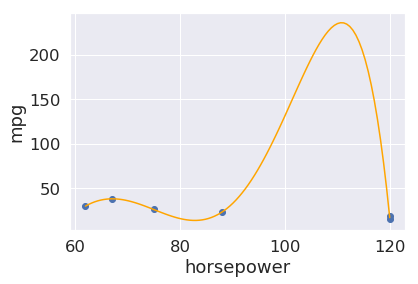

In [53]:
min_x = min(six_vehicles['horsepower'])
max_x = max(six_vehicles['horsepower'])
horsepower_values = np.linspace(min_x, max_x, 100).reshape((100, 1))
predicted_mpg = six_vehicle_model.predict(horsepower_values)
plt.scatter(six_vehicles['horsepower'], six_vehicles['mpg'])
plt.plot(horsepower_values, predicted_mpg, 'orange')
plt.xlabel("horsepower")
plt.ylabel("mpg")

(9.0, 46.6)

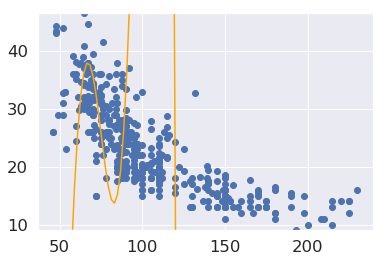

In [54]:
min_x = min(vehicle_data['horsepower'])
max_x = max(vehicle_data['horsepower'])
min_y = min(vehicle_data['mpg'])
max_y = max(vehicle_data['mpg'])
horsepower_values = np.linspace(min_x, max_x, 100).reshape((100, 1))
predicted_mpg = six_vehicle_model.predict(horsepower_values)
plt.scatter(vehicle_data['horsepower'], vehicle_data['mpg'])
plt.plot(horsepower_values, predicted_mpg, 'orange')
plt.ylim([min_y, max_y])

Text(155,41,'MSE: 18.49, order: 6')

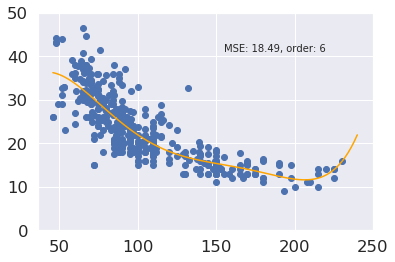

In [55]:
model_degree = 6

polyN_model_on_all_vehicles = Pipeline([
    ('polyN', PolynomialFeatures(degree=model_degree)),
    ('regression', LinearRegression(fit_intercept=False)),
])
polyN_model_on_all_vehicles.fit(vehicle_data[['horsepower']], vehicle_data['mpg'])

min_x = min(vehicle_data['horsepower'])
max_x = max(vehicle_data['horsepower'])
min_y = 0
max_y = 50
plt.ylim([min_y, max_y])

horsepower_values = np.linspace(46, 240, 100).reshape((100, 1))
predicted_mpg = polyN_model_on_all_vehicles.predict(horsepower_values)
plt.scatter(vehicle_data['horsepower'], vehicle_data['mpg'])
plt.plot(horsepower_values, predicted_mpg, 'orange')
plt.ylim([min_y, max_y])
mse = mean_squared_error(polyN_model_on_all_vehicles.predict(vehicle_data[['horsepower']]), vehicle_data['mpg'])
plt.text(155, 41, f"MSE: {mse:.2f}, order: {model_degree}")

In [56]:
poly3 = PolynomialFeatures(degree=3)
all_degree_3_combinations = poly3.fit_transform(vehicle_data[["cylinders", "displacement", "horsepower", 
                                                              "weight", "acceleration", "model_year"]])
all_degree_3_combinations.shape

(392, 84)

In [57]:
poly3.get_feature_names(["cylinders", "displacement", "horsepower", 
                         "weight", "acceleration", "model_year"])

['1',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'cylinders^2',
 'cylinders displacement',
 'cylinders horsepower',
 'cylinders weight',
 'cylinders acceleration',
 'cylinders model_year',
 'displacement^2',
 'displacement horsepower',
 'displacement weight',
 'displacement acceleration',
 'displacement model_year',
 'horsepower^2',
 'horsepower weight',
 'horsepower acceleration',
 'horsepower model_year',
 'weight^2',
 'weight acceleration',
 'weight model_year',
 'acceleration^2',
 'acceleration model_year',
 'model_year^2',
 'cylinders^3',
 'cylinders^2 displacement',
 'cylinders^2 horsepower',
 'cylinders^2 weight',
 'cylinders^2 acceleration',
 'cylinders^2 model_year',
 'cylinders displacement^2',
 'cylinders displacement horsepower',
 'cylinders displacement weight',
 'cylinders displacement acceleration',
 'cylinders displacement model_year',
 'cylinders horsepower^2',
 'cylinders horsepower weight',
 'cylinders horsepower acceler

In [58]:
model_84_f = LinearRegression(fit_intercept=False)
model_84_f.fit(all_degree_3_combinations, vehicle_data["mpg"])
mean_squared_error(model_84_f.predict(all_degree_3_combinations), vehicle_data["mpg"])

4.4274265724759125

In [59]:
all_degree_3_combinations[:, 0:30]
model_30_f = LinearRegression(fit_intercept=False)
model_30_f.fit(all_degree_3_combinations[:, 0:30], vehicle_data["mpg"])
mean_squared_error(model_30_f.predict(all_degree_3_combinations[:, 0:30]), vehicle_data["mpg"])

6.434552392656859

In [60]:
def get_mse_for_n_features(n):
    n_features = all_degree_3_combinations[:, 0:n]
    model = LinearRegression(fit_intercept=False)
    model.fit(n_features, vehicle_data["mpg"])
    return mean_squared_error(model.predict(n_features), vehicle_data["mpg"])

get_mse_for_n_features(84)

4.4274265724759125

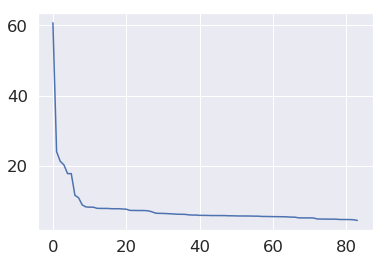

In [61]:
mses = [get_mse_for_n_features(i) for i in range(1, 85)]
plt.plot(mses)

In [66]:
#There are 392 data points
#Let's use 300 for training and 92 for validation
#Note: There is a better way to do this! Won't cover in lecture today.
#training_vehicle_data = vehicle_data.iloc[0:300, :]
#validation_vehicle_data = vehicle_data.iloc[300:, :]

#training_vehicle_data = vehicle_data.iloc[0:300, :]
#validation_vehicle_data = vehicle_data.iloc[300:, :]
training_vehicle_data, validation_vehicle_data = np.split(vehicle_data.sample(frac=1), [300]) 

training_vehicle_mpg = training_vehicle_data["mpg"]
validation_vehicle_mpg = validation_vehicle_data["mpg"]
training_vehicle_data = training_vehicle_data[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]
validation_vehicle_data = validation_vehicle_data[["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]]

In [67]:
poly3 = PolynomialFeatures(degree=3)
all_degree_3_combinations = poly3.fit_transform(training_vehicle_data)
all_degree_3_combinations.shape

(300, 84)

Text(0,0.5,'MSE')

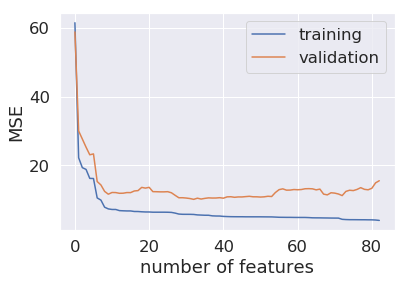

In [68]:
def get_training_and_validation_error(num_features):
    poly3 = PolynomialFeatures(degree=3)
    featurized_training_data = poly3.fit_transform(training_vehicle_data)[:, :num_features]
    featurized_validation_data = poly3.fit_transform(validation_vehicle_data)[:, :num_features]
    
    
    model = LinearRegression(fit_intercept=False)
    model.fit(featurized_training_data, training_vehicle_mpg)    
    
    training_mse = mean_squared_error(model.predict(featurized_training_data), training_vehicle_mpg)
    validation_mse = mean_squared_error(model.predict(featurized_validation_data), validation_vehicle_mpg)
    return training_mse, validation_mse

mses = []

for num_features in range(1, 84):
    mses.append(get_training_and_validation_error(num_features))

mses = np.array(mses)
plt.plot(mses[:, 0])
plt.plot(mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel("number of features")
plt.ylabel("MSE")

In [69]:
mses

array([[61.42508122, 58.7465311 ],
       [22.2157487 , 30.00110884],
       [19.33835404, 27.64749889],
       [18.82342206, 25.28022833],
       [16.2170107 , 23.07157694],
       [16.17550747, 23.32621993],
       [10.53819519, 15.30112388],
       [ 9.91437674, 14.31342596],
       [ 7.84814625, 12.43817094],
       [ 7.35404523, 11.62532965],
       [ 7.18883177, 12.12102281],
       [ 7.18590669, 12.09361358],
       [ 6.85585473, 11.88568831],
       [ 6.80011325, 11.91348675],
       [ 6.76142353, 12.09943966],
       [ 6.75957884, 12.08412198],
       [ 6.60463071, 12.55980929],
       [ 6.59400175, 12.66992212],
       [ 6.51481582, 13.60359976],
       [ 6.46411253, 13.38981793],
       [ 6.45965444, 13.62010593],
       [ 6.39662289, 12.36684365],
       [ 6.39577481, 12.34338439],
       [ 6.39537538, 12.30413012],
       [ 6.39536033, 12.30469757],
       [ 6.38367974, 12.35540585],
       [ 6.33842141, 12.03839162],
       [ 6.1348158 , 11.29742431],
       [ 5.85521711,